# CS 412 - Mini Project

[Link to dataset](https://www.kaggle.com/miroslavsabo/young-people-survey/data)

##### Imports:

In [2]:
%matplotlib inline
import pandas as pd
#import copy
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
#import corrplot

# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

#import warnings
#warnings.filterwarnings("ignore")

# a bit of machine learning
#from sklearn.metrics import recall_score, precision_score
#from sklearn.cross_validation import KFold, train_test_split, cross_val_score
#from sklearn.model_selection import GridSearchCV


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import grid_search
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn import metrics

C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [64]:
from sklearn import metrics

### Data Exploration

We use pandas for data exploration. We read the csv using pandas.

In [3]:
resp = pd.read_csv('responses.csv')

Now we take a look at it's first 5 records.

In [4]:
resp.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

Now we check some stats for the data.

In [5]:
resp.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

### Pre-processing

Now we start the pre-processing.

Finding missing values:

In [7]:
emptyVals = resp.isnull().sum().sort_values(ascending=False)
print(emptyVals)

Weight                            20
Height                            20
Passive sport                     15
Chemistry                         10
Geography                          9
Documentary                        8
Latino                             8
Smoking                            8
Punk                               8
Theatre                            8
Rock n roll                        7
Countryside, outdoors              7
Gardening                          7
Techno, Trance                     7
Alternative                        7
Reggae, Ska                        7
Classical music                    7
Age                                7
Daily events                       7
Compassion to animals              7
Final judgement                    7
Criminal damage                    7
Science and technology             6
Biology                            6
Giving                             6
Writing                            6
Art exhibitions                    6
R

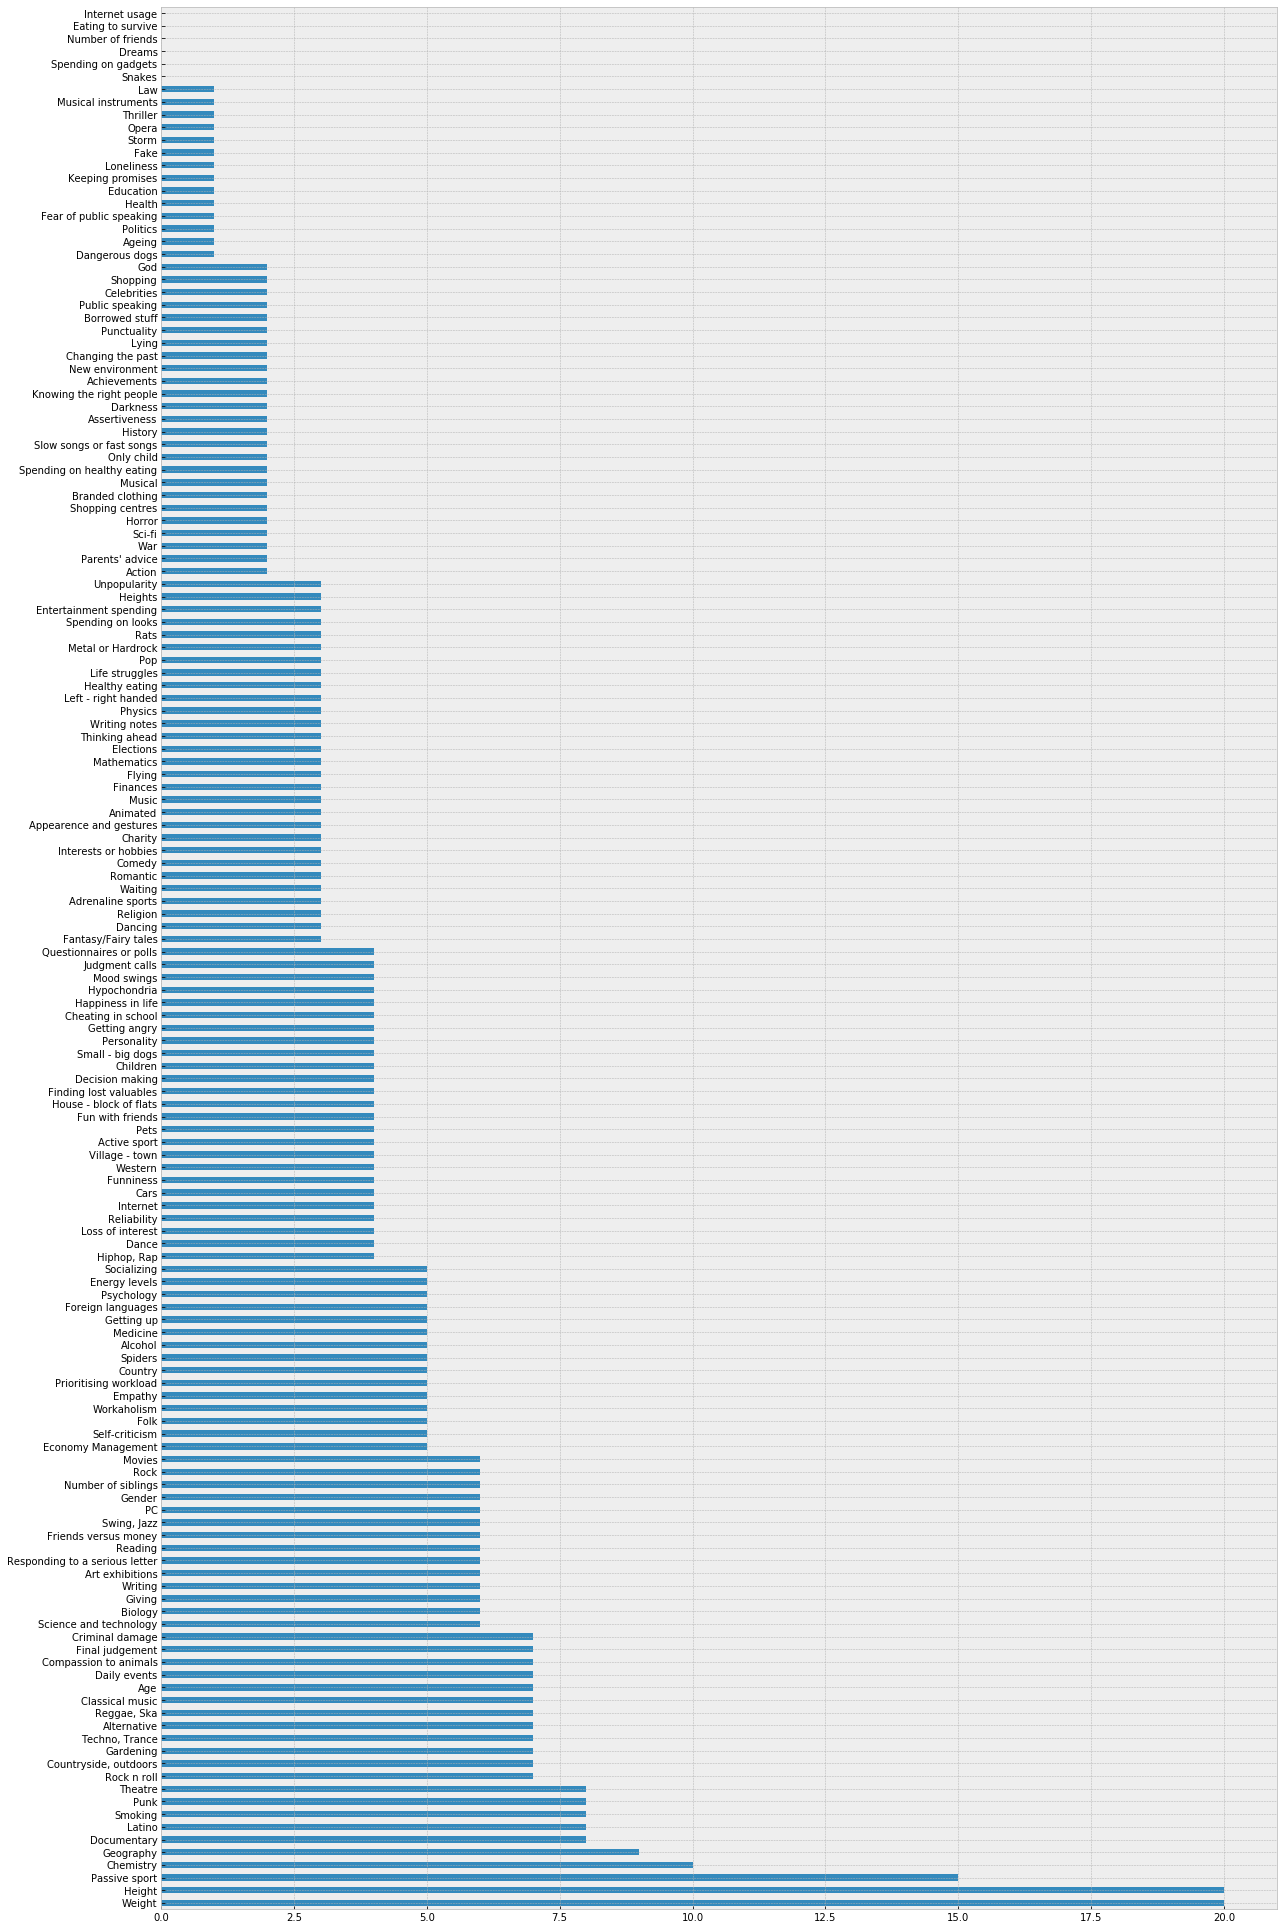

In [8]:
emptyPlot = emptyVals.plot(kind='barh', figsize = (20,35))

As we have NaN and infinite value in our target column so we take the records which have finite values.

In [9]:
# if infinite values present then take only finite values
if len(resp['Empathy']) - len(resp[np.isfinite(resp['Empathy'])]):
    print("Number of infinite or NaN values in Empathy column: ", len(resp['Empathy']) - len(resp[np.isfinite(resp['Empathy'])]))
    resp = resp[np.isfinite(resp['Empathy'])] 

Number of infinite or NaN values in Empathy column:  5


Now we check whether there are categorical features and remove them.

In [23]:
resp.select_dtypes([object])

""
0
1
2
3
4
5
6
7
8
9


In [16]:
# Removing categorical features if they exist
if pd.Categorical(resp).dtype.name == 'category':
    resp = resp.select_dtypes(exclude=[object])

Now we fill the NaN values with the mean values for the respective column.

In [17]:
## Fill NAN values with the mean of the data
resp=resp.fillna(resp.mean()) 
resp.isnull().sum()

Music                             0
Slow songs or fast songs          0
Dance                             0
Folk                              0
Country                           0
Classical music                   0
Musical                           0
Pop                               0
Rock                              0
Metal or Hardrock                 0
Punk                              0
Hiphop, Rap                       0
Reggae, Ska                       0
Swing, Jazz                       0
Rock n roll                       0
Alternative                       0
Latino                            0
Techno, Trance                    0
Opera                             0
Movies                            0
Horror                            0
Thriller                          0
Comedy                            0
Romantic                          0
Sci-fi                            0
War                               0
Fantasy/Fairy tales               0
Animated                    

Now we seperate the empathy column and take it as the labels and the remaining data as the train data.

In [18]:
# train labels
Y= resp['Empathy'].values

In [19]:
# train data
X = resp.drop('Empathy',axis=1)

Now we do the automatic feature selection.

In [64]:
 ######################## Feature Selection
X_new = SelectKBest(chi2, k=6).fit_transform(X, Y)

We compare the shapes of train data before feature selection and after feature selection.

In [21]:
print("Old shape of training data: ", X.shape)
#print("New shape of training data: ", X_new.shape)

Old shape of training data:  (1005, 138)


Now we check which columns are of type float and int and check their range in order to check them for scaling purposes.

In [24]:
for n in X.columns[(X.dtypes=="float64")|(X.dtypes=="int64")]:
    print(n + " : (" + str(X[n].min()) + ", " + str(X[n].max()) + ")")    

Music : (1.0, 5.0)
Slow songs or fast songs : (1.0, 5.0)
Dance : (1.0, 5.0)
Folk : (1.0, 5.0)
Country : (1.0, 5.0)
Classical music : (1.0, 5.0)
Musical : (1.0, 5.0)
Pop : (1.0, 5.0)
Rock : (1.0, 5.0)
Metal or Hardrock : (1.0, 5.0)
Punk : (1.0, 5.0)
Hiphop, Rap : (1.0, 5.0)
Reggae, Ska : (1.0, 5.0)
Swing, Jazz : (1.0, 5.0)
Rock n roll : (1.0, 5.0)
Alternative : (1.0, 5.0)
Latino : (1.0, 5.0)
Techno, Trance : (1.0, 5.0)
Opera : (1.0, 5.0)
Movies : (1.0, 5.0)
Horror : (1.0, 5.0)
Thriller : (1.0, 5.0)
Comedy : (1.0, 5.0)
Romantic : (1.0, 5.0)
Sci-fi : (1.0, 5.0)
War : (1.0, 5.0)
Fantasy/Fairy tales : (1.0, 5.0)
Animated : (1.0, 5.0)
Documentary : (1.0, 5.0)
Western : (1.0, 5.0)
Action : (1.0, 5.0)
History : (1.0, 5.0)
Psychology : (1.0, 5.0)
Politics : (1.0, 5.0)
Mathematics : (1.0, 5.0)
Physics : (1.0, 5.0)
Internet : (1.0, 5.0)
PC : (1.0, 5.0)
Economy Management : (1.0, 5.0)
Biology : (1.0, 5.0)
Chemistry : (1.0, 5.0)
Reading : (1.0, 5.0)
Geography : (1.0, 5.0)
Foreign languages : (1.0, 

Since there is difference in the range of values for some columns (Age, Height, Weight), hence we should do feature scaling.

In [25]:
## Feature Scaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

Now we check for mean and variance for the float and int valued columns. We do this to check if we require feature standardization.

In [28]:
for n in X.columns[(X.dtypes=="float64")|(X.dtypes=="int64")]:
    if np.mean(X[n]) > 0 and np.var(X[n]) > 0:
        print(n + " : Mean = " + str(np.mean(X[n])) + " , Variance = " + str(np.var(X[n])))

Music : Mean = 4.735528942115768 , Variance = 0.4347414623489383
Slow songs or fast songs : Mean = 3.3310069790628116 , Variance = 0.690652420846907
Dance : Mean = 3.112887112887113 , Variance = 1.3693967723818465
Folk : Mean = 2.29 , Variance = 1.2914427860696553
Country : Mean = 2.124 , Variance = 1.1548497512437805
Classical music : Mean = 2.955911823647295 , Variance = 1.5483185276024476
Musical : Mean = 2.7629482071713145 , Variance = 1.5896335057778794
Pop : Mean = 3.4690618762475047 , Variance = 1.3428267842424677
Rock : Mean = 3.7657657657657664 , Variance = 1.3902379991932152
Metal or Hardrock : Mean = 2.362275449101797 , Variance = 1.8840736437572507
Punk : Mean = 2.458375125376129 , Variance = 1.6811169827891654
Hiphop, Rap : Mean = 2.911088911088911 , Variance = 1.8816785204844797
Reggae, Ska : Mean = 2.7685370741482966 , Variance = 1.4642110090828195
Swing, Jazz : Mean = 2.755755755755755 , Variance = 1.5685615964222803
Rock n roll : Mean = 3.14128256513026 , Variance = 1.

In [29]:
#### remove as will not work for k best features
# Feature Standardizer
scaler = StandardScaler().fit(rescaledX)
standardizedX = scaler.transform(rescaledX)

We also normalize the data.

In [30]:
# Feature Normalizer
normalizer = Normalizer().fit(standardizedX)
normalizedX = normalizer.transform(standardizedX)

### Now we start testing different learning models

We split the data into train(90%), validation(10%) and test(10%).

In [33]:
X_t, X_te, y_t, y_te = train_test_split(normalizedX, Y, test_size=0.1, random_state=1)
X_t, X_v, y_t, y_v = train_test_split(X_t, y_t, test_size=0.1, random_state=1)

###### Gaussian Naive Bayes model

In [41]:
clfGNB = GaussianNB().fit(X_t, y_t)
predictedNB = clfGNB.predict(X_v)
print(np.mean(predictedNB == y_v))

0.406593406593


If we cross validate using train data.

In [68]:
predictedNB = cross_val_predict(GaussianNB(), X_t, y_t, cv=3)
print(classification_report(y_t, predictedNB))
print("The accuracy score is {:.2%}".format(metrics.accuracy_score(y_t, predictedNB)))

             precision    recall  f1-score   support

        1.0       0.14      0.18      0.16        33
        2.0       0.15      0.28      0.19        72
        3.0       0.33      0.20      0.25       177
        4.0       0.28      0.21      0.24       239
        5.0       0.50      0.60      0.54       292

avg / total       0.35      0.35      0.34       813

The accuracy score is 35.06%


###### Decision Tree

In [38]:
clfDT = DecisionTreeClassifier().fit(X_t, y_t)
predictedDT = clfDT.predict(X_v)
print(np.mean(predictedDT == y_v))

0.362637362637


If we cross validate using train data.

In [69]:
predictedDT = cross_val_predict(DecisionTreeClassifier(), X_t, y_t, cv=3)
print(classification_report(y_t, predictedDT))
print("The accuracy score is {:.2%}".format(metrics.accuracy_score(y_t, predictedDT)))

             precision    recall  f1-score   support

        1.0       0.03      0.03      0.03        33
        2.0       0.09      0.10      0.10        72
        3.0       0.30      0.36      0.33       177
        4.0       0.31      0.26      0.28       239
        5.0       0.45      0.46      0.45       292

avg / total       0.33      0.33      0.33       813

The accuracy score is 32.72%


######  K - Nearest Neighbors

In [44]:
clfKNN = KNeighborsClassifier().fit(X_t, y_t)
predictedKNN = clfKNN.predict(X_v)  
print(np.mean(predictedKNN == y_v))

0.340659340659


If we cross validate using train data.

In [70]:
predictedKNN = cross_val_predict(KNeighborsClassifier(), X_t, y_t, cv=3)
print(classification_report(y_t, predictedKNN))
print("The accuracy score is {:.2%}".format(metrics.accuracy_score(y_t, predictedKNN)))

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00        33
        2.0       0.21      0.22      0.21        72
        3.0       0.29      0.33      0.31       177
        4.0       0.30      0.30      0.30       239
        5.0       0.44      0.43      0.44       292

avg / total       0.33      0.33      0.33       813

The accuracy score is 33.46%


###### Support Vector Machine

In [47]:
clfSVC = SVC().fit(X_t,y_t)
predictedSVC = clfSVC.predict(X_v)
print(np.mean(predictedSVC == y_v))

0.428571428571


If we cross validate using train data.

In [71]:
predictedSVC = cross_val_predict(SVC(), X_t, y_t, cv=3)
print(classification_report(y_t, predictedSVC))
print("The accuracy score is {:.2%}".format(metrics.accuracy_score(y_t, predictedSVC)))

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00        33
        2.0       0.00      0.00      0.00        72
        3.0       0.00      0.00      0.00       177
        4.0       0.00      0.00      0.00       239
        5.0       0.36      1.00      0.53       292

avg / total       0.13      0.36      0.19       813

The accuracy score is 35.92%


C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


###### Random Forest Classifier

In [50]:
clfRF = RandomForestClassifier().fit(X_t,y_t)
predictedRF = clfRF.predict(X_v)  
print(np.mean(predictedRF == y_v))

0.384615384615


If we cross validate using train data.

In [72]:
predictedRF = cross_val_predict(RandomForestClassifier(), X_t, y_t, cv=3)
print(classification_report(y_t, predictedRF))
print("The accuracy score is {:.2%}".format(metrics.accuracy_score(y_t, predictedRF)))

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00        33
        2.0       0.18      0.08      0.11        72
        3.0       0.28      0.32      0.30       177
        4.0       0.30      0.31      0.31       239
        5.0       0.44      0.49      0.46       292

avg / total       0.32      0.34      0.33       813

The accuracy score is 34.32%


###### Multiple Layer Perceptron

In [52]:
clfMLP = MLPClassifier().fit(X_t,y_t) 
predictedMLP = clfMLP.predict(X_v)  
print(np.mean(predictedMLP == y_v))

0.461538461538


C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


If we cross validate using train data.

In [73]:
predictedMLP = cross_val_predict(MLPClassifier(), X_t, y_t, cv=3)
print(classification_report(y_t, predictedMLP))
print("The accuracy score is {:.2%}".format(metrics.accuracy_score(y_t, predictedMLP)))

C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


             precision    recall  f1-score   support

        1.0       0.18      0.06      0.09        33
        2.0       0.17      0.12      0.15        72
        3.0       0.36      0.32      0.34       177
        4.0       0.29      0.33      0.31       239
        5.0       0.53      0.59      0.56       292

avg / total       0.38      0.39      0.38       813

The accuracy score is 39.11%


C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


###### Ensembling MLP and SVM

In [55]:
clfVC1 = VotingClassifier(estimators = [('svc', clfSVC), ('mlp', clfMLP)]).fit(X_t,y_t)
predictedVC1 = clfVC1.predict(X_v)
print(np.mean(predictedVC1 == y_v))

0.428571428571


C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


If we cross validate using train data.

In [74]:
predictedVC1 = cross_val_predict(VotingClassifier(estimators = [('svc', clfSVC), ('mlp', clfMLP)]), X_t, y_t, cv=3)
print(classification_report(y_t, predictedVC1))
print("The accuracy score is {:.2%}".format(metrics.accuracy_score(y_t, predictedVC1)))

C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


             precision    recall  f1-score   support

        1.0       0.33      0.06      0.10        33
        2.0       0.19      0.15      0.17        72
        3.0       0.38      0.37      0.37       177
        4.0       0.30      0.33      0.32       239
        5.0       0.50      0.55      0.52       292

avg / total       0.38      0.39      0.38       813

The accuracy score is 38.99%


C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


###### Ensembling SVM, MLP and GNB

In [56]:
clfVC2 = VotingClassifier(estimators = [('svc', clfSVC), ('mlp', clfMLP), ('gnb', clfGNB)]).fit(X_t,y_t)
predictedVC2 = clfVC2.predict(X_v)
print(np.mean(predictedVC2 == y_v))

0.43956043956


C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


If we cross validate using train data.

In [75]:
predictedVC2 = cross_val_predict(VotingClassifier(estimators = [('svc', clfSVC), ('mlp', clfMLP), ('gnb', clfGNB)]), X_t, y_t, cv=3)
print(classification_report(y_t, predictedVC2))
print("The accuracy score is {:.2%}".format(metrics.accuracy_score(y_t, predictedVC2)))

C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


             precision    recall  f1-score   support

        1.0       0.19      0.21      0.20        33
        2.0       0.15      0.28      0.20        72
        3.0       0.36      0.22      0.27       177
        4.0       0.31      0.13      0.18       239
        5.0       0.49      0.73      0.58       292

avg / total       0.37      0.38      0.35       813

The accuracy score is 38.13%


C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


###### Ensembling SVM, MLP, GNB, DT and KNN

In [76]:
clfVC2 = VotingClassifier(estimators = [('svc', clfSVC), ('mlp', clfMLP), ('gnb', clfGNB), ('dt', clfDT), ('knn', clfKNN)]).fit(X_t,y_t)
predictedVC3 = clfVC2.predict(X_v)
print(np.mean(predictedVC3 == y_v))

0.43956043956


C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


If we cross validate using train data.

In [77]:
predictedVC3 = cross_val_predict(VotingClassifier(estimators = [('svc', clfSVC), ('mlp', clfMLP), ('gnb', clfGNB), ('dt', clfDT), ('knn', clfKNN)]), X_t, y_t, cv=3)
print(classification_report(y_t, predictedVC3))
print("The accuracy score is {:.2%}".format(metrics.accuracy_score(y_t, predictedVC3)))

C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


             precision    recall  f1-score   support

        1.0       0.25      0.09      0.13        33
        2.0       0.18      0.19      0.19        72
        3.0       0.34      0.28      0.31       177
        4.0       0.32      0.23      0.27       239
        5.0       0.47      0.65      0.55       292

avg / total       0.36      0.38      0.36       813

The accuracy score is 38.25%


C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


After training multiple classifiers (with default parameters) on train data and then predicting on validation data we find that we get the most accuracy using Multiple Layer Perceptron. Hence, now we tune it's hyper parameters to further improve it's accuracy. We now check the parameters of MLP:

In [58]:
clfMLP.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
parameters = {'max_iter':np.arange(200,500,50)}
clfMLPGS = grid_search.GridSearchCV(MLPClassifier(), parameters, cv=10)
clfMLPGS.fit(X_t, y_t)
predictedMLPGS = clfMLPGS.predict(X_v)
print(clfMLPGS.best_params_)
print(np.mean(predictedMLPGS == y_v))

In [79]:
parameters = {'activation':['logistic', 'tanh', 'relu', 'identity']}
clfMLPGS = grid_search.GridSearchCV(MLPClassifier(), parameters, cv=10)
clfMLPGS.fit(X_t, y_t)
predictedMLPGS = clfMLPGS.predict(X_v)
print(clfMLPGS.best_params_)
print(np.mean(predictedMLPGS == y_v))

C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\sanku\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

{'activation': 'logistic'}
0.450549450549


In [ ]:
parameters = {'hidden_layer_sizes':np.arange(10,150,10), 'max_iter':np.arange(200,500,50), 'activation':['logistic', 'tanh','relu'], 'solver':['lbfgs', 'sgd', 'adam'], 'learning_rate':['constant', 'invscaling', 'adaptive']}
clfMLPGS = grid_search.GridSearchCV(MLPClassifier(), parameters, cv=10)
clfMLPGS.fit(X_t, y_t)
print(clfMLPGS.best_params_)
identity’, ‘logistic’, ‘tanh’, ‘relu’

In [78]:
clfMLP = MLPClassifier(hidden_layer_sizes = ).fit(X_t,y_t) 
predictedMLP = clfMLP.predict(X_v)  
print(np.mean(predictedMLP == y_v))

0.373626373626


In [599]:
#[{'hidden_layer_sizes':np.arange(10,150,10),'max_iter':[30] ,'activation':['logistic', 'tanh','relu']}]
hiddenLayerSize = [np.arange(10,150,10)]
maxIter = [np.arange(10,50,10)]
act = ['logistic', 'tanh','relu']
solver = ['lbfgs', 'sgd', 'adam']
alpha = []
learningRate = ['constant', 'invscaling', 'adaptive']



In [603]:
for hl in hiddenLayerSize:
    for mxItr in maxIter:
        for at in act:
            clfMLP = MLPClassifier(hidden_layer_sizes = hl, max_iter = mxItr, activation = at).fit(X_t,y_t) 
            predictedMLP = clfMLP.predict(X_v)  
            print(np.mean(predictedMLP == y_v))

TypeError: '<=' not supported between instances of 'str' and 'int'